In [1]:
import pandas as pd
import numpy as np
import scipy
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Median Imputation For Treating the outliers

Basically what we gonna do.

We gonna find the outlier using IQR-Inter Quartile Range
we will replace the outlier by median of that column


In [8]:
def mi(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[col]) #This the Median for that column
    for i in df[col]:
        if(i>Upper_tail or i<Lower_tail):
            df[col]=df[col].replace(i,med)
    sns.boxplot(x=col,data=df)

#### BoxCox Function Body For Treating outliers

In [9]:

def bxcx(col):
    data = df[col].values
    df[col], fitted_lambda= scipy.stats.boxcox(data[data > 0])
    sns.boxplot(x=col,data=df)

#### Module for Log-Transformation

In [10]:
def lo(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    train['Cost of Living Index'] = np.log(train['Cost of Living Index'])
    sns.boxplot(x=col,data=df)

#### It seems that it does not have any missing or Null values

In [11]:
df.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [12]:
## Required plots for AGE columns
def plot(col):       
    f, axes = plt.subplots(2,2,figsize=(10,10))
    sns.boxplot(x=df[col],orient='v' , ax=axes[0,0])
    sns.histplot(x=df[col], ax=axes[0,1])
    sns.distplot(x=df[col], ax=axes[1,0])

C:\Users\manisha\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\manisha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


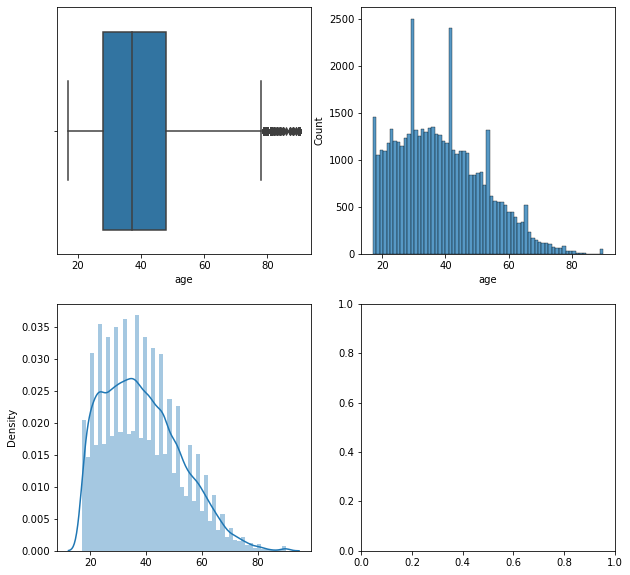

In [13]:
plot('age')

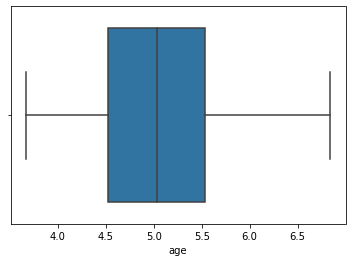

In [14]:
bxcx('age')

<AxesSubplot:>

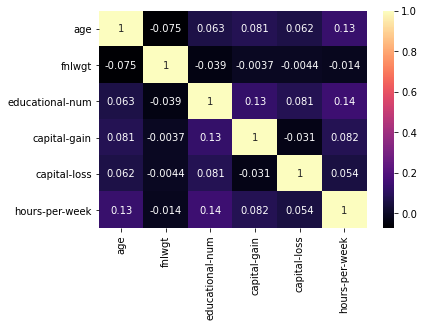

In [15]:
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [16]:
### Lets see the Unique Values for Every Column. Because checking for individual column will be too much time consuming.

In [17]:
col=df.columns.values

In [18]:
for i in col:
    print('--'*20,i,'--'*20,'\n',df[i].unique())
    print('--'*20,i+'Value_counts','--'*20)
    print(df[i].value_counts())

---------------------------------------- age ---------------------------------------- 
 [4.32100588 5.08350285 4.52190782 5.36394248 3.76064417 4.87548078
 4.5849267  6.08168698 4.24960858 5.80483054 6.1463366  4.98187735
 4.39008405 5.91232293 5.53381768 5.31948908 3.93687544 5.03325682
 5.18080623 6.36039864 5.40756983 4.099116   4.17571263 5.76792386
 4.76378766 5.45040433 5.84118757 3.66638737 5.13266932 5.69238562
 4.01959022 5.27417422 4.8203326  4.64617711 5.49247718 5.22796008
 3.8506743  6.27085942 5.61441056 4.70576523 5.94713426 5.57445346
 5.65371353 4.45700344 5.87701273 6.01532092 6.1142202  6.55792203
 6.38956098 5.73044879 6.50301107 6.58494847 6.04872479 4.9293063
 6.24029878 6.17804781 6.44691024 5.98146206 6.20936498 6.33090012
 6.30105673 6.84091797 6.61169754 6.4183955  6.53061179 6.63817548
 6.66438827 6.71604147 6.47511295 6.69034174 6.81640897 6.79167166
 6.76670127 6.7414929 ]
---------------------------------------- ageValue_counts ----------------------------

---------------------------------------- income ---------------------------------------- 
 ['<=50K' '>50K']
---------------------------------------- incomeValue_counts ----------------------------------------
<=50K    37155
>50K     11687
Name: income, dtype: int64


C:\Users\manisha\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\manisha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


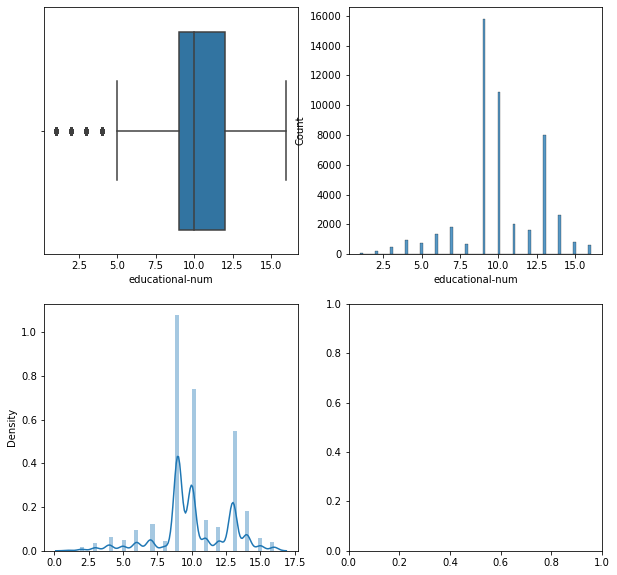

In [19]:
### education number 

plot('educational-num')

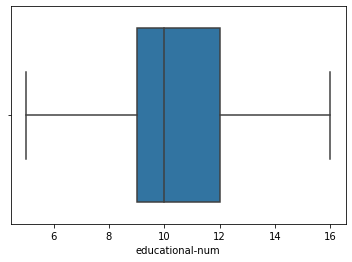

In [20]:

mi('educational-num')

#### Univariate Analysis of Workclass

In [21]:

df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

### It contains ? values in the column. Since we have seen that Workclass is object so we can't take the median or mean in this case -- This will be Problamatic. So we simply remove it

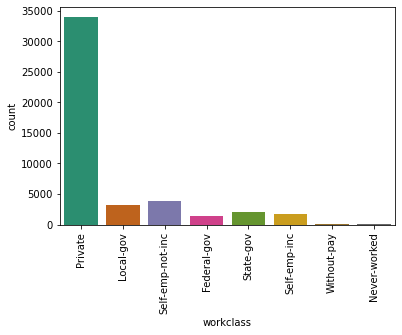

In [22]:
df = df[df['workclass'] != "?"] ## Removing the ? from the columns of Workclass
plt.xlim(0,34000)
sns.countplot(x=df['workclass'],data=df,palette="Dark2")
plt.xticks(rotation=90)

plt.show()

### Univariate Analysis of Education

In [23]:

df['education'].value_counts()

HS-grad         14974
Some-college    10038
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           845
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: education, dtype: int64

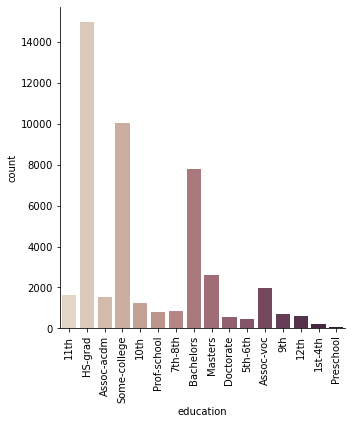

In [24]:

sns.catplot(x="education", kind="count", palette="ch:.25", data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
df['marital-status'].value_counts()

Married-civ-spouse       21452
Never-married            14882
Divorced                  6364
Separated                 1433
Widowed                   1296
Married-spouse-absent      584
Married-AF-spouse           32
Name: marital-status, dtype: int64

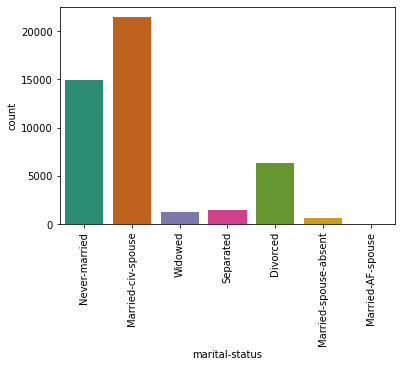

In [26]:
sns.countplot(x=df['marital-status'],data=df,palette="Dark2")

plt.xticks(rotation=90)
plt.show()

#### Univariate Analysis of occupation

In [27]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces', '?'],
      dtype=object)

In [28]:
df = df[df['occupation'] != "?"]

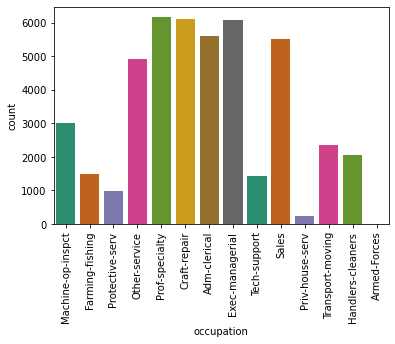

In [29]:

sns.countplot(x=df['occupation'],data=df,palette="Dark2")

plt.xticks(rotation=90)
plt.show()

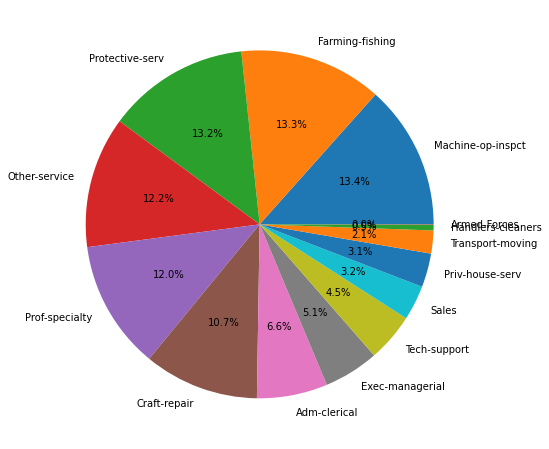

In [30]:

plt.figure(figsize=(15,8))
labels=df.occupation.unique()
data=df.occupation.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

### Majority of the peoples are doing Fishing and Farming

In [31]:

df.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

### Univariate Analysis of Race

In [32]:
df.race.unique()
##3Since 72% of the citizens living in USA are White American(note: the U.S. the U.S. Source sensus), we will reduce race category into two categories White and others.It will also helpful when we will do dummies it will reduce the no the columns in the dataset.

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [33]:
df.loc[df['race'] != 'White', 'race'] = 'Other'
df.race.value_counts()

White    39444
Other     6589
Name: race, dtype: int64

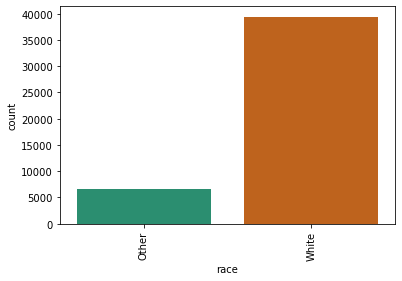

In [34]:
sns.countplot(x=df['race'],data=df,palette="Dark2")

plt.xticks(rotation=90)
plt.show()

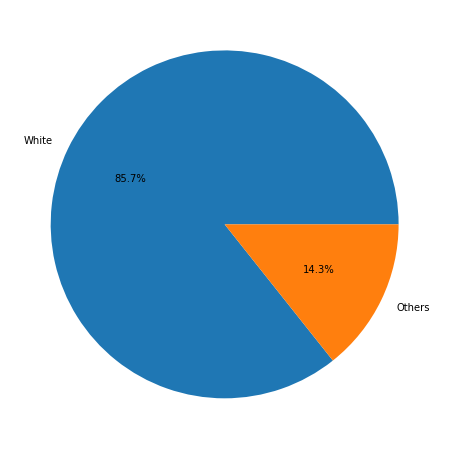

['White', 'Others']

In [35]:
plt.figure(figsize=(15,8))
labels=['White','Others']
data=df.race.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()
labels

#### Univariate Analysis of Gender

In [36]:
m=float(df.gender[df.gender=='Male'].value_counts())
f=float(df.gender[df.gender=='Female'].value_counts())
df.gender.value_counts()

Male      31114
Female    14919
Name: gender, dtype: int64

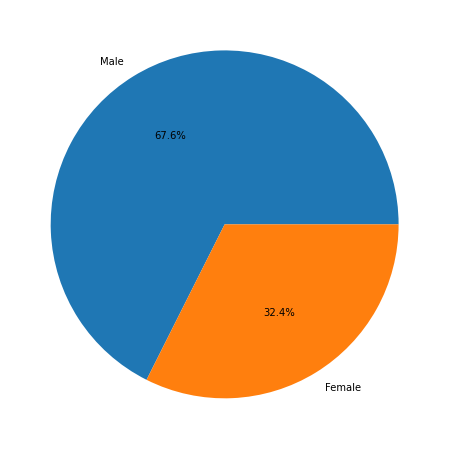

In [37]:
plt.figure(figsize=(15,8))
labels=['Male','Female']
data=df.gender.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

### Univariate Analysis of Capital_gains and capital_loss

In [38]:
df['capital']=df['capital-gain']-df['capital-loss']

In [39]:
df.capital.value_counts()

 0        39991
 15024      508
 7688       402
 7298       358
-1902       301
          ...  
-1870         1
 7262         1
-419          1
 2387         1
 22040        1
Name: capital, Length: 217, dtype: int64

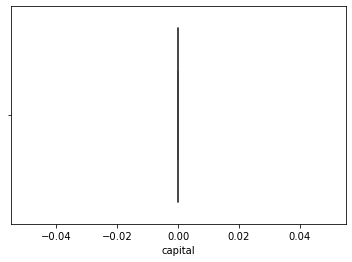

In [40]:
mi('capital')

### Univariate Analysis of hours-per-week

In [41]:

df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 48, 25, 20, 45, 47, 35, 43, 90, 54, 60, 38,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21, 46,  3,  1, 49,
       67, 76, 23,  2, 58, 26, 34,  4,  7, 51, 78, 63,  5, 31, 92, 77, 27,
       29, 85,  6, 13, 19, 98, 62, 66, 57, 86, 11, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

C:\Users\manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

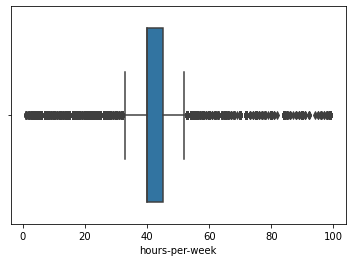

In [42]:
sns.boxplot(df['hours-per-week'])

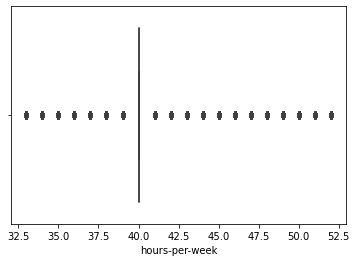

In [43]:
mi('hours-per-week')

In [44]:
df['hours-per-week'].value_counts()

40.0    33877
50.0     4165
45.0     2652
35.0     1799
48.0      748
38.0      692
42.0      329
36.0      314
44.0      305
37.0      237
43.0      221
52.0      202
46.0      128
47.0       82
39.0       62
33.0       60
41.0       56
34.0       47
49.0       37
51.0       20
Name: hours-per-week, dtype: int64

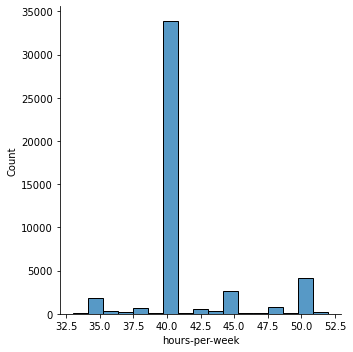

In [45]:
sns.displot(df['hours-per-week'])

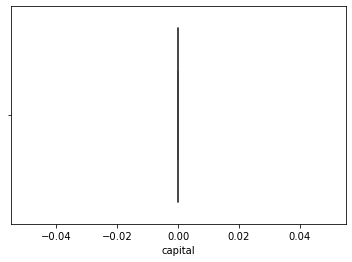

In [46]:
mi('capital')


### Lets make the Govt employees list

In [47]:

df.gender.value_counts()

Male      31114
Female    14919
Name: gender, dtype: int64

C:\Users\manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


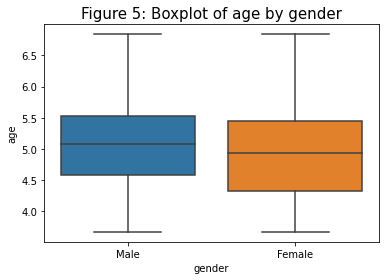

In [48]:
# Creating a boxplot
sns.boxplot(df['gender'], df['age']);
plt.title('Figure 5: Boxplot of age by gender', fontsize = 15)
plt.show()

In [49]:
df['marital-status'].value_counts()

Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: marital-status, dtype: int64

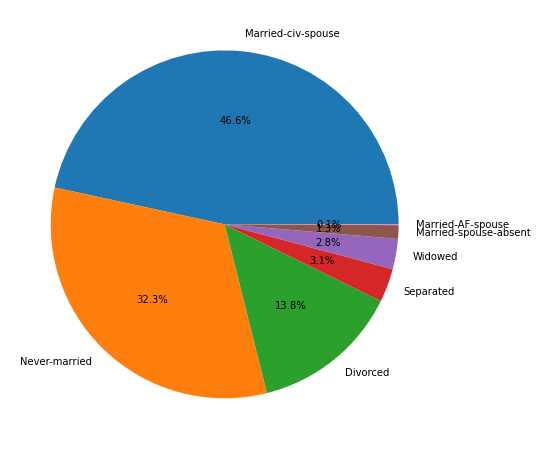

In [50]:
plt.figure(figsize=(15,8))
labels=['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse']
data=df['marital-status'].value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

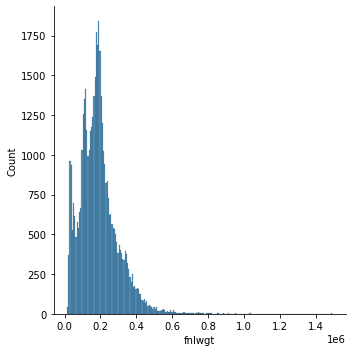

In [51]:
###Mans have more weekly hours in duty
sns.displot(df['fnlwgt'])


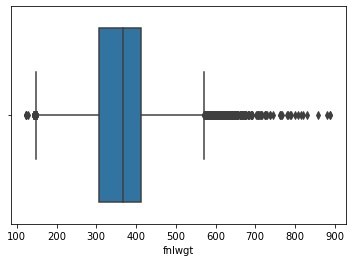

In [52]:
bxcx('fnlwgt')

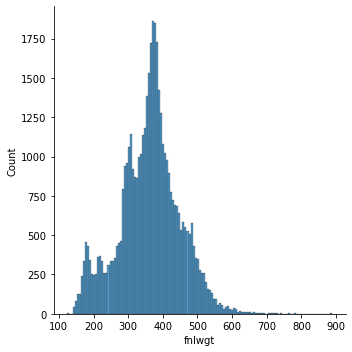

In [53]:

sns.displot(df['fnlwgt'])

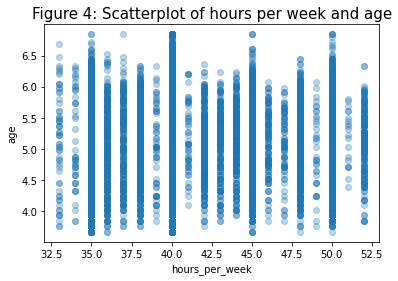

In [54]:

# store the values of hours-per-week
hpw = df['hours-per-week']

# get a scatter plot
plt.scatter(hpw, df['age'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of hours per week and age', fontsize = 15)
plt.xlabel('hours_per_week')
plt.ylabel('age')
plt.show();

C:\Users\manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


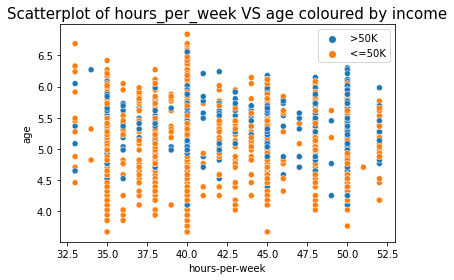

In [55]:

# Getting the index of those who work in the government
gov_emp = df['workclass'].isin(['Federal-gov','Local-gov','State-gov'])

# creating a dataframe of those who work in the government
gov = df[gov_emp]

# creating a scatterplot
sns.scatterplot(gov['hours-per-week'], gov['age'], hue = gov['income'])
plt.title('Scatterplot of hours_per_week VS age coloured by income', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

In [56]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital
0,4.321006,Private,404.804708,11th,7.0,Never-married,Machine-op-inspct,Own-child,Other,Male,0,0,40.0,United-States,<=50K,0.0
1,5.083503,Private,274.526158,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,0.0
2,4.521908,Local-gov,477.742486,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,0.0
3,5.363942,Private,350.058508,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,7688,0,40.0,United-States,>50K,0.0
5,4.875481,Private,382.984898,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,0.0


In [57]:
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [58]:
df = df[df['native-country'] != "?"]

In [59]:
df['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [60]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-country'


In [61]:
### Splitting the Data into input and Target Variable

In [62]:
from sklearn.preprocessing import MinMaxScaler
df_sklearn = df.copy()
column = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital']

df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]))

In [63]:
df_sklearn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital
0,0.206210,Private,0.367490,11th,0.181818,Never-married,Machine-op-inspct,Own-child,Other,Male,0,0,0.368421,United-States,low,0.0
1,0.446402,Private,0.197355,HS-grad,0.363636,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,0.894737,United-States,low,0.0
2,0.269495,Local-gov,0.462742,Assoc-acdm,0.636364,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,0.368421,United-States,high,0.0
3,0.534742,Private,0.295995,Some-college,0.454545,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,7688,0,0.368421,United-States,high,0.0
5,0.380873,Private,0.338994,10th,0.090909,Never-married,Other-service,Not-in-family,White,Male,0,0,0.368421,United-States,low,0.0


In [64]:

data=pd.get_dummies(df_sklearn,drop_first=True)

In [65]:
data.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'capital', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_

In [66]:

data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.0,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.425728,0.310719,0.486433,1101.430344,88.595418,0.430948,0.0,0.068551,0.736522,0.036398,...,0.051214,0.258768,0.029831,0.146522,0.105878,0.046239,0.860267,0.675048,0.913095,0.752156
std,0.206247,0.114305,0.199655,7506.430084,404.956092,0.186405,0.0,0.252691,0.440524,0.187281,...,0.220436,0.437963,0.170122,0.353632,0.307684,0.210004,0.346714,0.468362,0.281698,0.431766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269495,0.239989,0.363636,0.000000,0.000000,0.368421,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.430574,0.316831,0.454545,0.000000,0.000000,0.368421,0.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.575231,0.378194,0.727273,0.000000,0.000000,0.368421,0.0,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,99999.000000,4356.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
### Train test splitting 
target=data['income_low']
input=data.iloc[:,:53]

In [68]:
### Importinmg decision tree 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3)

model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
y_pred=model.predict(x_test)

In [70]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
acc=acc.mean()*100

In [71]:
print('Decision Tree Accuracy : ',round(np.array(acc).mean(),2))

Decision Tree Accuracy :  81.38


In [72]:
### Uding KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:

y_pred=knn.predict(x_test)

In [74]:
acc=knn.score(x_test,y_test)

In [75]:
print('KNN Accuracy : ',round(np.array(acc).mean(),2)*100,' %')

KNN Accuracy :  84.0  %


In [76]:
### USing XGboost
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}